In [1]:
%reset -f
from utils.csvMaker import mat_to_csv
import utils.FrequencyDomainAnalysis as FD
import utils.TimeFrequencyDomainAnalysis as TFD
import HHT.hht, HHT.visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt


PATH = './Data/Case/48k/'
# mat_to_csv(PATH)

In [5]:
# TestFigure = pd.read_csv(PATH + 'csvFigure/B_DE.csv')

# length = 5000
# for i in range(10):
#     plt.plot(TestFigure[length*i:length*(i+1)])
# plt.show()

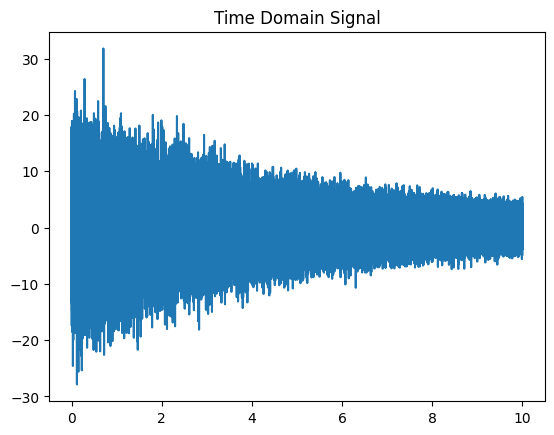

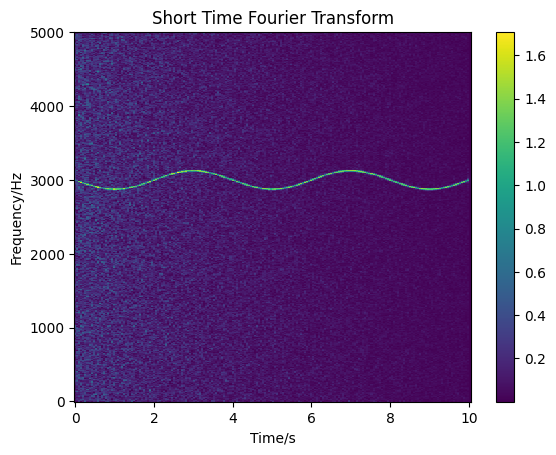

In [3]:
# 短时傅里叶变换STFT

# 创建一震荡衰减、含高斯噪声、频率调制的信号
fsTest = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fsTest / 2
time = np.arange(N) / float(fsTest)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod) # 频率调制

rng = np.random.default_rng()
noise = rng.normal(scale=np.sqrt(noise_power),
                   size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

plt.plot(time, x)
plt.title('Time Domain Signal')
plt.show()

# 可见STFT可将波动的频率提取出来   
STFT = TFD.ShortTimeFourierTransform(fsTest, x, nperseg=1024)
STFT.plot()

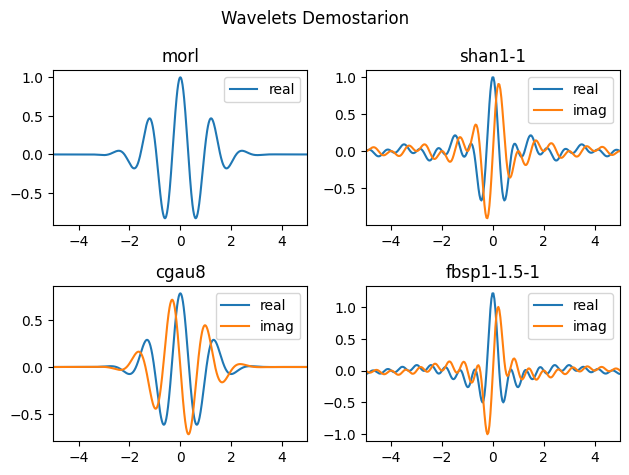

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']
['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym

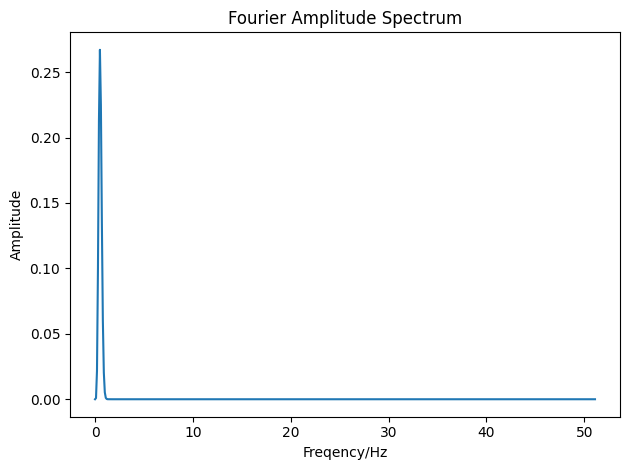

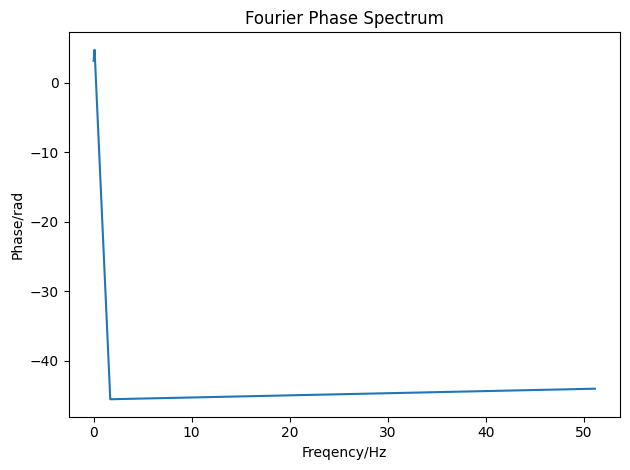

In [3]:
TFD.WaveletShow('morl', 'shan1-1', 'cgau8', 'fbsp1-1.5-1')

# 连续小波与离散小波种类
print(pywt.wavelist(kind='continuous'))
print(pywt.wavelist(kind='discrete'))

# 展示小波函数的频谱，可见其具有提取某频段的频率的作用
[psi, x] = pywt.ContinuousWavelet('gaus5').wavefun(10)
WaveletFrequency = len(x)/(np.max(x) - np.min(x))
MorletFFT = FD.FourierTransform(WaveletFrequency, psi)
MorletFFT.plot()

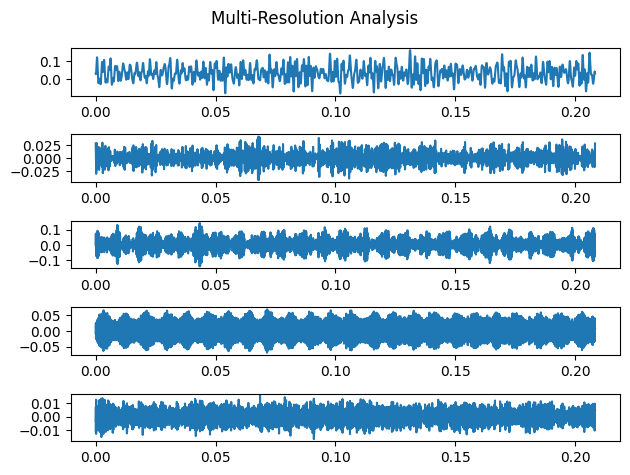

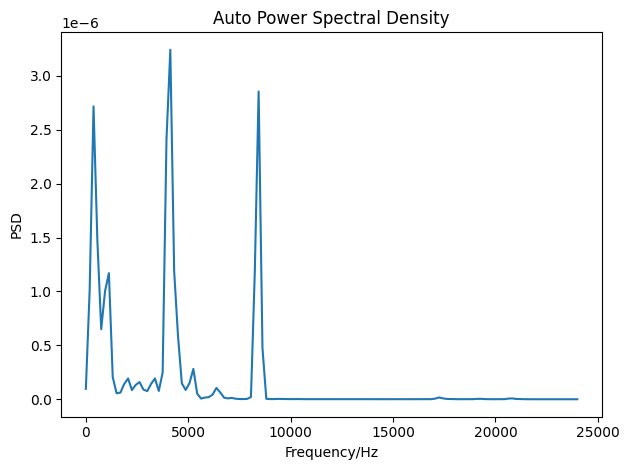

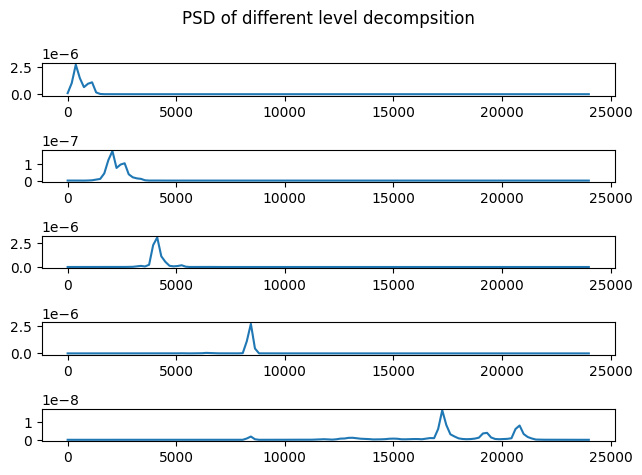

In [9]:
# 多分辨分析
fig1 = pd.read_csv(PATH + 'csvFigure/N_FE.csv')
fs = 48000

signal1 = np.squeeze(np.array(fig1))
signal1 = signal1[:10000]

MRA = TFD.MultiResolutionAnalysis(fs, signal1, 'coif4')
MRA.plot()

# 展示多分辨分析不同级次分解信号的功率谱
# 可见多分辨分析将原信号分解成了不同的频段
OrigPSD = FD.PowerSpectralDensity(fs, signal1)
OrigPSD.plot()
for i in range(MRA.level):
    MRAPSD = FD.PowerSpectralDensity(fs, MRA.Multi[i])
    
    plt.subplot(MRA.level, 1, i+1)
    plt.plot(MRAPSD.Frequency, MRAPSD.Auto)
    
plt.suptitle('PSD of different level decompsition')
plt.tight_layout()
plt.show()

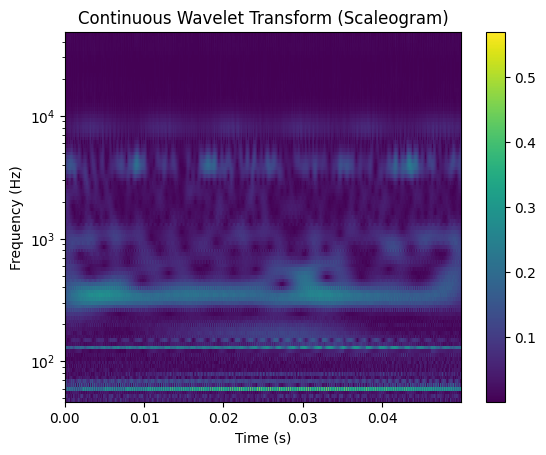

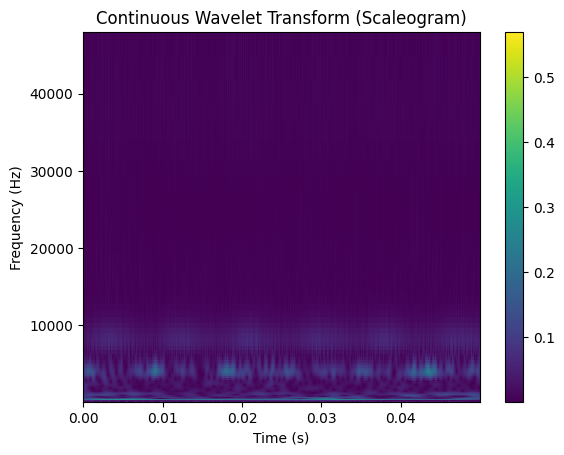

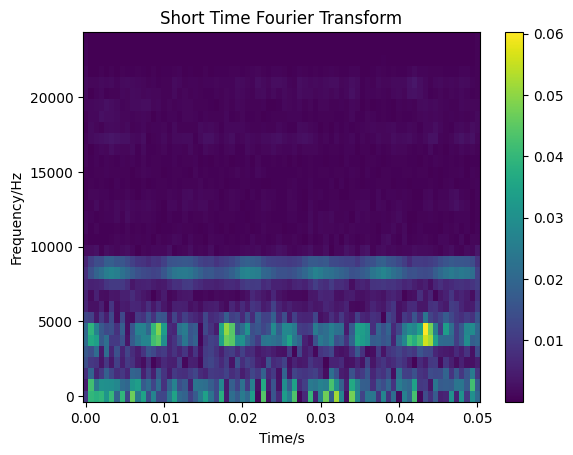

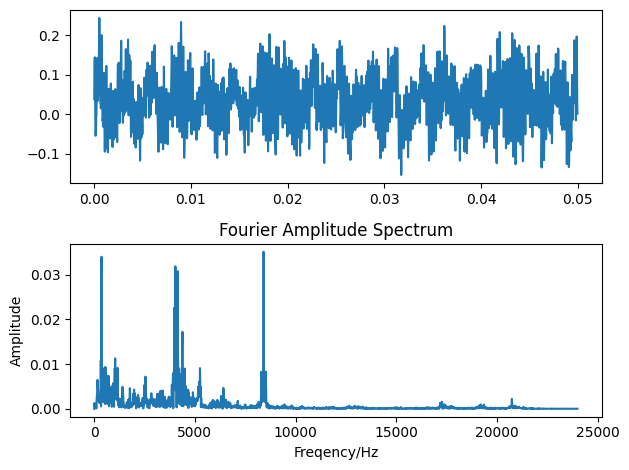

In [13]:
# 连续小波变换
fig1 = pd.read_csv(PATH + 'csvFigure/N_FE.csv')
fs = 48000

signal1 = np.squeeze(np.array(fig1))
signal1 = signal1[:2400]

# 连续小波变换
# 振动信号多数处于低频段，对数坐标更清晰
# 图中可清晰地看出高频部分时间分辨率高，低频部分频率分辨率高，小波变换的分辨率自适应的特点
CWT = TFD.ContinuousWaveletTransform(fs, signal1)
CWT.plot(True)  # 对数坐标作图
CWT.plot(False) # 线性坐标作图 

# 采用短时傅里叶变换无法自动调整分辨率，体现了小波变换的优越性
STFT = TFD.ShortTimeFourierTransform(fs, signal1, nperseg=64)
STFT.plot()

# 时域图
plt.subplot(2,1,1)
plt.plot(CWT.time, signal1)

# 频谱
plt.subplot(2,1,2)
FFT = FD.FourierTransform(fs, signal1)
FFT.plot(ShowPhase = False, Show = False)
plt.show()




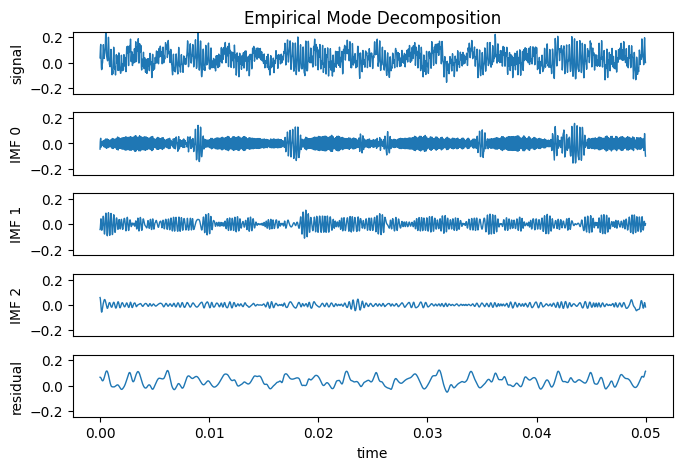

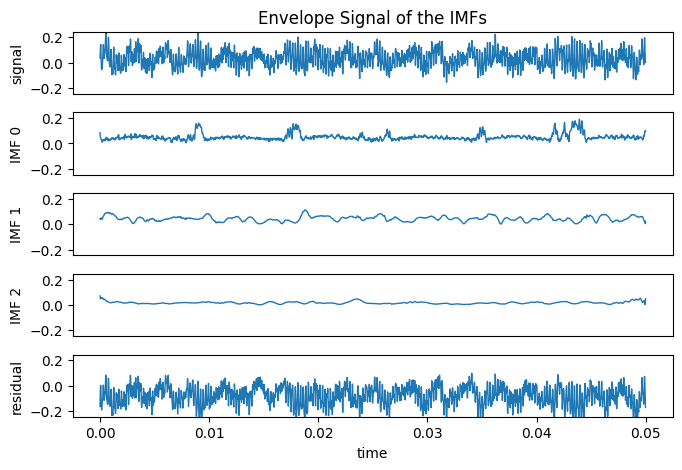

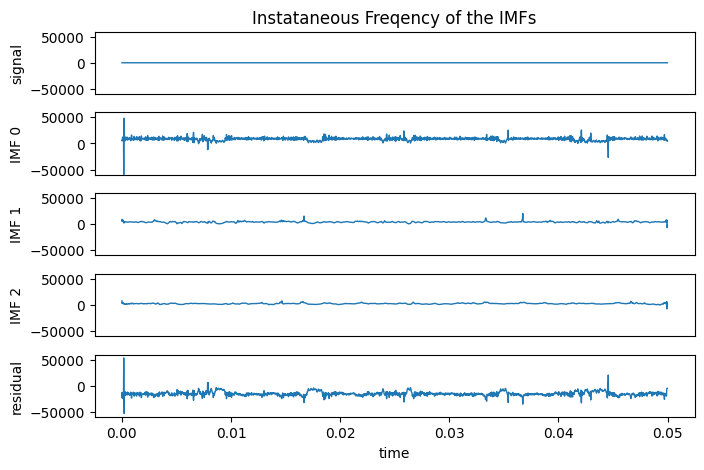

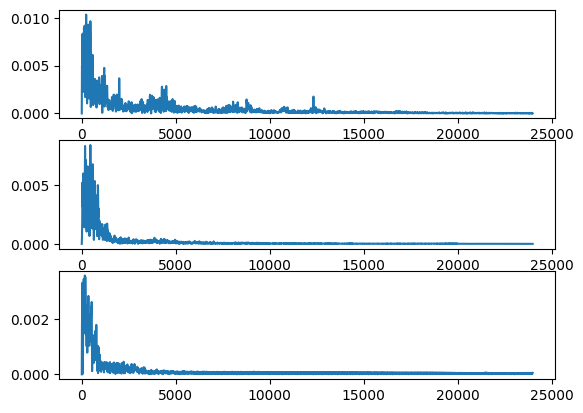

In [5]:
# Hilbert-Huang变换
# 源代码来自 https://github.com/chendaichao/Hilbert-Huang-transform.git，仅作学习用途

fig1 = pd.read_csv(PATH + 'csvFigure/N_FE.csv')
fs = 48000

signal1 = np.squeeze(np.array(fig1))
signal1 = signal1[:2400]

# 查看分解得到的IMF
imfs, imfs_env, imfs_freq = HHT.hht.hilbert_huang(signal1, fs, num_imf=3)
HHT.visualization.plot_IMFs(signal1, imfs, fs)
HHT.visualization.plot_IMFs(signal1, imfs_env, fs, 
                            title='Envelope Signal of the IMFs')
HHT.visualization.plot_IMFs(signal1, imfs_freq, fs, 
                            title='Instataneous Freqency of the IMFs')

# 对分解信号做解调分析
IMF0 = np.array(imfs_env[0,:])
IMF1 = np.array(imfs_env[1,:])
IMF2 = np.array(imfs_env[2,:])

plt.subplot(3, 1, 1)
fft0 = FD.FourierTransform(fs, IMF0)
plt.plot(fft0.Freqency, fft0.Amplitude)

plt.subplot(3, 1, 2)
fft1 = FD.FourierTransform(fs, IMF1)
plt.plot(fft1.Freqency, fft1.Amplitude)

plt.subplot(3, 1, 3)
fft2 = FD.FourierTransform(fs, IMF2)
plt.plot(fft2.Freqency, fft2.Amplitude)
plt.show()

